<a href="https://colab.research.google.com/github/amotu/DSCI-400/blob/main/DSCI_400_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pandas.read_csv('/content/combined_data.csv', index_col = 'id') # Upload (drag and drop) the csv file to your working directory
df

,a,covid_status,ep,g,l_c,l_l,l_s,rU,asthma,cough,smoker,ht,cold,diabetes,um,ihd,bd,st,fever,ftg,mp,loss_of_smell,test_status,pneumonia,diarrhoea,cld
id,,,,,,,,,,,,,,,,,,,,,,,,,,
DRBAZX64nuVtqBQf13gH7r36Mh52,26,healthy,y,female,United States,Madison,Wisconsin,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jw7YMfwGqMX22UbHh1TTgYMTYWs1,16,healthy,y,female,India,24 pargana,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xa2v8z3Yzgb9dFrq2gEZz6oS7fh1,26,resp_illness_not_identified,y,male,India,Kolkata,West Bengal,n,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xwHQrG0KwjTLJvBYVtVXfHp4JAd2,32,resp_illness_not_identified,y,male,Sri Lanka,Sri Jatawardanapura,Western Province,n,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xKW2EpGmJcfigLecUTLVXEWQHPg2,22,healthy,y,male,India,Kolkata,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sy1VK1UgX0ZMcMJitgPal1sp8jj2,20,healthy,y,female,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4drDZUlQcteX5StlFT2CXEL0N0L2,57,healthy,y,male,India,bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,True,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qSDQMZj4iqhaRUz1SvwiUqyUzKH3,52,healthy,y,male,India,Bangalore,Karnataka,n,NaN,True,NaN,NaN,True,NaN,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, DRBAZX64nuVtqBQf13gH7r36Mh52 to JQyIFoDDO1fwOuEH0GaOFskQ90q1
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   a              1503 non-null   int64 
 1   covid_status   1503 non-null   object
 2   ep             1503 non-null   object
 3   g              1503 non-null   object
 4   l_c            1503 non-null   object
 5   l_l            1312 non-null   object
 6   l_s            1503 non-null   object
 7   rU             823 non-null    object
 8   asthma         59 non-null     object
 9   cough          102 non-null    object
 10  smoker         110 non-null    object
 11  ht             91 non-null     object
 12  cold           81 non-null     object
 13  diabetes       76 non-null     object
 14  um             465 non-null    object
 15  ihd            5 non-null      object
 16  bd             20 non-null     object
 17  st             51 non-nul

In [18]:
df.describe()

,a
count,1503.000000
mean,33.163007
std,12.149892
min,1.000000
25%,24.000000
50%,30.000000
75%,40.000000
max,87.000000


Text(0, 0.5, 'Frequency')

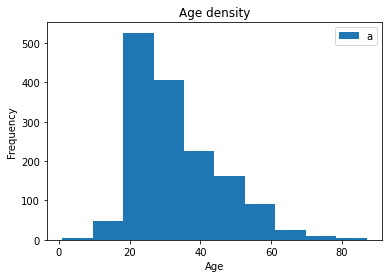

In [19]:
ax = df.plot.hist(['a'], title='Age density')
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")

# Data Access

In [2]:
import os
from google.colab import drive

In [3]:
drive.mount('/content/gdrive') # Run and choose your school google drive and copy and paste the key and press enter

Mounted at /content/gdrive


In [4]:
os.chdir('/content/gdrive/MyDrive/DSCI400/Coswara-Data-master/Coswara-Data-master') # I think this should work, but navigate to the folder where Coswara Data Master is

In [ ]:
# !python extract_data.py Used to extract data but dont run its already there 

In [ ]:
# Run just in case, also ! is for linux commands
!pip install  numpy keras librosa matplotlib 
!apt-get install -y -qq ffmpeg

In [6]:
import librosa
import librosa.display

In [7]:
y, sr = librosa.load('/content/gdrive/MyDrive/DSCI400/Coswara-Data-master/Coswara-Data-master/Extracted_data/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/cough-heavy.wav')

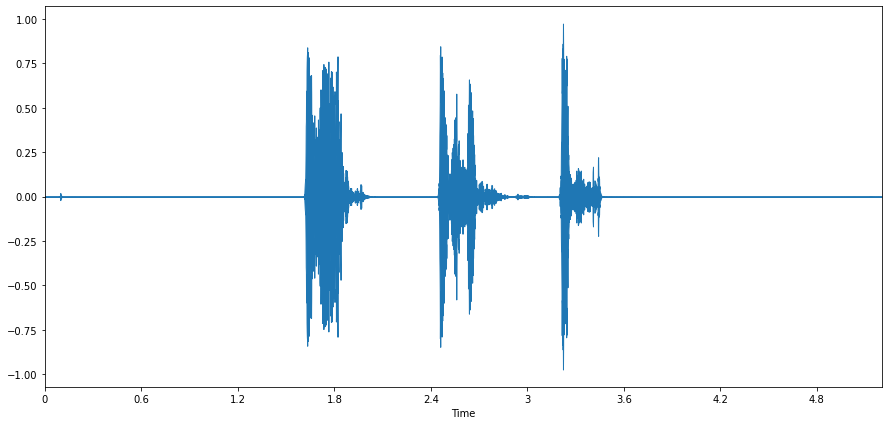

In [10]:
plt.figure(figsize=(15,7))
librosa.display.waveplot(y,sr=sr)

In [11]:
import IPython.display as ipd
ipd.Audio(y,rate=sr)

In [12]:
 mfcc = librosa.feature.mfcc(y=y, sr=sr)
 mfcc

array([[-5.5477197e+02, -5.5383130e+02, -5.5260565e+02, ...,
        -5.5219116e+02, -5.5344733e+02, -5.5336407e+02],
       [ 0.0000000e+00,  1.2719653e+00,  2.9330583e+00, ...,
        -2.8301177e+00,  1.1081522e+00,  1.9470897e+00],
       [ 0.0000000e+00,  1.1020942e+00,  2.5535569e+00, ...,
         2.2514729e+00,  1.6036973e+00,  1.8172960e+00],
       ...,
       [ 0.0000000e+00,  4.4706187e-01,  6.8942624e-01, ...,
         1.7823589e-01, -9.6228909e-01, -1.7423518e+00],
       [ 0.0000000e+00,  7.5122845e-01,  1.2812654e+00, ...,
        -1.5557363e+00, -1.1384516e+00, -1.5322628e+00],
       [ 0.0000000e+00,  9.8286617e-01,  1.7210542e+00, ...,
         2.3844037e+00, -4.9742740e-01, -1.2569199e+00]], dtype=float32)

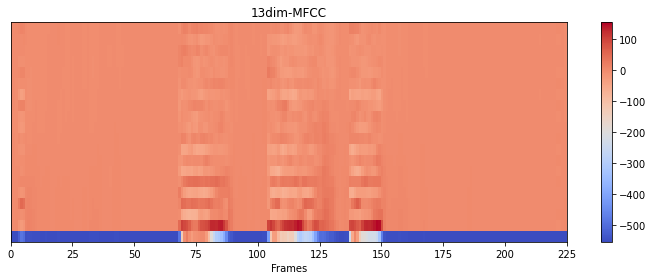

In [13]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='frames')
plt.colorbar()
plt.title('13dim-MFCC')
plt.tight_layout()

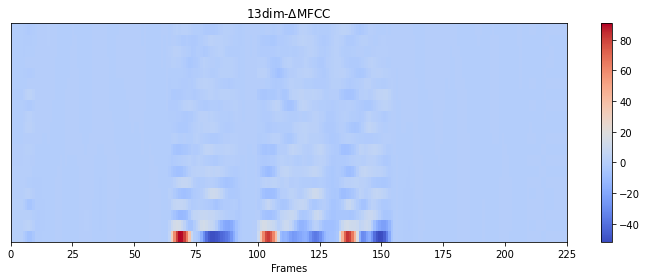

In [14]:
plt.figure(figsize=(10, 4))
delta=librosa.feature.delta(mfcc)
librosa.display.specshow(delta, x_axis='frames')
plt.colorbar()
plt.title('13dim-$\Delta$MFCC')
plt.tight_layout()